In [1]:
import pandas as pd

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [22]:
financial_data=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_financial_data.csv")
# wayne_financial_data.head()

financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Division                     40 non-null     object 
 1   Quarter                      40 non-null     object 
 2   Year                         40 non-null     int64  
 3   Revenue_M                    40 non-null     float64
 4   Operating_Costs_M            40 non-null     float64
 5   Net_Profit_M                 40 non-null     float64
 6   Employee_Count               40 non-null     int64  
 7   RD_Investment_M              40 non-null     float64
 8   Market_Share_Pct             32 non-null     float64
 9   Customer_Satisfaction_Score  40 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.3+ KB


In [42]:
financial_data['Year'].unique()

array([2023, 2024], dtype=int64)

In [43]:
trend = (
    financial_data.groupby(["Year", "Quarter"])[["Revenue_M", "Net_Profit_M"]]
    .sum()
    .reset_index()
    .sort_values(by=["Year", "Quarter"])
)
trend



,Year,Quarter,Revenue_M,Net_Profit_M
0,2023,Q1,5262.5,1170.0
1,2023,Q2,5793.2,1347.9
2,2023,Q3,6223.2,1466.5
3,2023,Q4,6943.1,1727.9
4,2024,Q1,6556.8,1594.2
5,2024,Q2,7323.1,1820.9
6,2024,Q3,7982.7,2044.2
7,2024,Q4,8597.8,2286.9


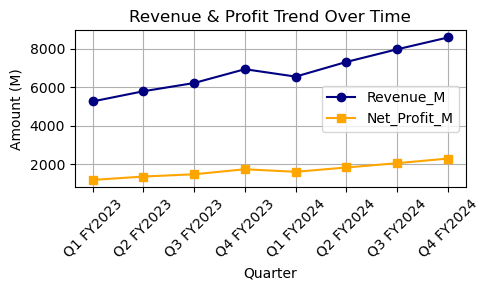

In [45]:
import matplotlib.pyplot as plt

trend["Period"] = trend["Quarter"] + " FY" + trend["Year"].astype(str)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

plt.plot(trend["Period"], trend["Revenue_M"], marker='o', label="Revenue_M", color='navy')
plt.plot(trend["Period"], trend["Net_Profit_M"], marker='s', label="Net_Profit_M", color='orange')

plt.title("Revenue & Profit Trend Over Time")
plt.xlabel("Quarter")
plt.ylabel("Amount (M)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [46]:
financial_data["GVA"] = financial_data["Revenue_M"] - financial_data["Operating_Costs_M"]

In [47]:
trend_gdp = (
    financial_data.groupby(["Year", "Quarter"])[["Revenue_M", "GVA"]]
    .sum()
    .reset_index()
    .sort_values(by=["Year", "Quarter"])
)
trend_gdp



,Year,Quarter,Revenue_M,GVA
0,2023,Q1,5262.5,1200.6
1,2023,Q2,5793.2,1382.5
2,2023,Q3,6223.2,1515.5
3,2023,Q4,6943.1,1832.7
4,2024,Q1,6556.8,1684.4
5,2024,Q2,7323.1,1950.5
6,2024,Q3,7982.7,2195.0
7,2024,Q4,8597.8,2465.7


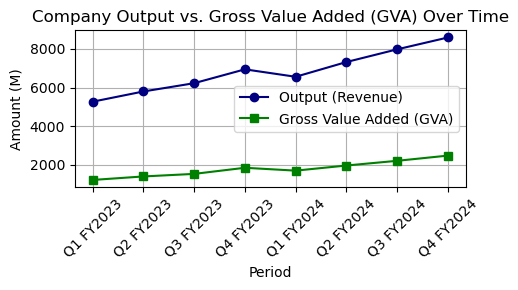

In [49]:
import matplotlib.pyplot as plt
trend_gdp["Period"] = trend_gdp["Quarter"] + " FY" + trend_gdp["Year"].astype(str)


plt.figure(figsize=(5, 3))

plt.plot(trend_gdp["Period"], trend_gdp["Revenue_M"],
         marker='o', label="Output (Revenue)", color='navy')

plt.plot(trend_gdp["Period"], trend_gdp["GVA"],
         marker='s', label="Gross Value Added (GVA)", color='green')

plt.title("Company Output vs. Gross Value Added (GVA) Over Time")
plt.xlabel("Period")
plt.ylabel("Amount (M)")

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:


quarterly = (
    financial_data.groupby(["Year", "Quarter"])[["Revenue_M", "GVA"]]
    .sum()
    .reset_index()
    .sort_values(["Year", "Quarter"])
)

quarterly



,Year,Quarter,Revenue_M,GVA
0,2023,Q1,5262.5,1200.6
1,2023,Q2,5793.2,1382.5
2,2023,Q3,6223.2,1515.5
3,2023,Q4,6943.1,1832.7
4,2024,Q1,6556.8,1684.4
5,2024,Q2,7323.1,1950.5
6,2024,Q3,7982.7,2195.0
7,2024,Q4,8597.8,2465.7


In [51]:
# Calculate for each quarter
quarterly["GDP_YoY_%"] = (
    quarterly.groupby("Quarter")["Revenue_M"].pct_change() * 100
)
quarterly["GVA_YoY_%"] = (
    quarterly.groupby("Quarter")["GVA"].pct_change() * 100
)

quarterly


,Year,Quarter,Revenue_M,GVA,GDP_YoY_%,GVA_YoY_%
0,2023,Q1,5262.5,1200.6,NaN,NaN
1,2023,Q2,5793.2,1382.5,NaN,NaN
2,2023,Q3,6223.2,1515.5,NaN,NaN
3,2023,Q4,6943.1,1832.7,NaN,NaN
4,2024,Q1,6556.8,1684.4,24.594774,40.296518
5,2024,Q2,7323.1,1950.5,26.408548,41.084991
6,2024,Q3,7982.7,2195.0,28.273236,44.836688
7,2024,Q4,8597.8,2465.7,23.832294,34.539204


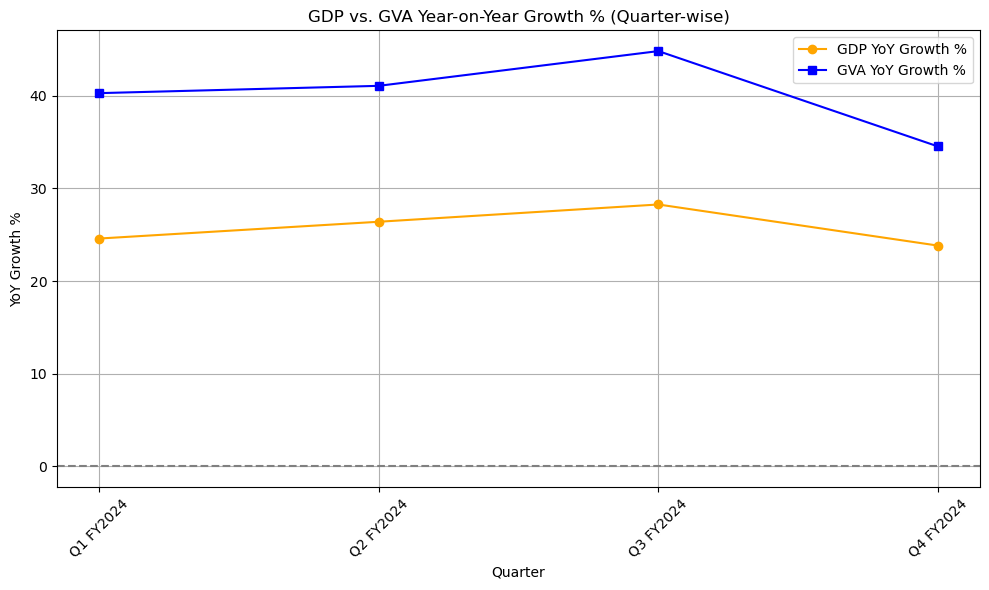

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(
    quarterly["Quarter"] + " FY" + quarterly["Year"].astype(str),
    quarterly["GDP_YoY_%"],
    label="GDP YoY Growth %", color="orange", marker='o'
)
plt.plot(
    quarterly["Quarter"] + " FY" + quarterly["Year"].astype(str),
    quarterly["GVA_YoY_%"],
    label="GVA YoY Growth %", color="blue", marker='s'
)

plt.title("GDP vs. GVA Year-on-Year Growth % (Quarter-wise)")
plt.xlabel("Quarter")
plt.ylabel("YoY Growth %")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:

division_revenue = (
    financial_data.groupby("Division")["Revenue_M"]
    .sum()
    .reset_index()
    .sort_values(by="Revenue_M", ascending=True)  # sort for nicer bars
)
division_revenue


,Division,Revenue_M
4,Wayne Foundation,2029.4
1,Wayne Applied Sciences,7874.5
2,Wayne Biotech,10059.5
0,Wayne Aerospace,12804.1
3,Wayne Construction,21914.9


In [13]:
wayne_hr_analytics=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_hr_analytics.csv")
# wayne_financial_data.head()

wayne_hr_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Department                   216 non-null    object 
 1   Employee_Level               216 non-null    object 
 2   Date                         216 non-null    object 
 3   Retention_Rate_Pct           216 non-null    float64
 4   Training_Hours_Annual        216 non-null    int64  
 5   Performance_Rating           216 non-null    float64
 6   Salary_Band                  216 non-null    object 
 7   Benefits_Utilization_Pct     216 non-null    float64
 8   Security_Clearance_Level     216 non-null    object 
 9   Internal_Promotions          216 non-null    int64  
 10  Diversity_Index              216 non-null    float64
 11  Employee_Satisfaction_Score  216 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 20.4+ KB


In [14]:
wayne_rd_portfolio=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_rd_portfolio.csv")
# wayne_financial_data.head()

wayne_rd_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project_ID                   75 non-null     object 
 1   Project_Name                 75 non-null     object 
 2   Division                     75 non-null     object 
 3   Start_Date                   75 non-null     object 
 4   Status                       75 non-null     object 
 5   Budget_Allocated_M           75 non-null     float64
 6   Budget_Spent_M               75 non-null     float64
 7   Research_Category            75 non-null     object 
 8   Patent_Applications          75 non-null     int64  
 9   Commercialization_Potential  75 non-null     object 
 10  Timeline_Adherence_Pct       75 non-null     float64
 11  Lead_Scientist               75 non-null     object 
 12  Security_Classification      75 non-null     object 
dtypes: float64(3), int64(1

In [15]:
wayne_security_data=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_security_data.csv")
# wayne_financial_data.head()

wayne_security_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                108 non-null    object 
 1   District                            108 non-null    object 
 2   Security_Incidents                  108 non-null    int64  
 3   Response_Time_Minutes               108 non-null    float64
 4   Wayne_Tech_Deployments              108 non-null    int64  
 5   Public_Safety_Score                 108 non-null    float64
 6   Infrastructure_Investments_M        108 non-null    float64
 7   Crime_Prevention_Effectiveness_Pct  108 non-null    float64
 8   Community_Engagement_Events         108 non-null    int64  
 9   Employee_Safety_Index               108 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.6+ KB


In [16]:
wayne_supply_chain=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_supply_chain.csv")
# wayne_financial_data.head()

wayne_supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Facility_Location          90 non-null     object 
 1   Product_Line               90 non-null     object 
 2   Date                       90 non-null     object 
 3   Monthly_Production_Volume  90 non-null     int64  
 4   Supply_Chain_Disruptions   90 non-null     int64  
 5   Cost_Per_Unit              90 non-null     float64
 6   Quality_Score_Pct          90 non-null     float64
 7   Sustainability_Rating      90 non-null     object 
 8   Vendor_Count               90 non-null     int64  
 9   Lead_Time_Days             90 non-null     int64  
 10  Inventory_Turnover         90 non-null     float64
 11  Carbon_Footprint_MT        90 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.6+ KB
